*Maestría de Ciencia de Datos - UNAJ*

# Trabajo Final: Aplicaciones de Ciencia de datos

*Febrero 2026*

## Integrantes
- Raul Burgos
- Mauro Cejas Marcovecchio
- Raul Muñoz
- Mirta Soto

## Descripción

El objetivo del siguiente trabajo es el análisis exploratorio, preprocesamiento de datos y el desarrollo de modelos de machine
learning sobre el dataset provisto por el Sistema de Información y Gestión Agrometeorológica (SIGA), del [Instituto Nacional de Tecnología Agropecuaria (INTA)](https://siga.inta.gob.ar/). Esta base de datos contiene información agrometeorológica de la Provincia de Corrientes, Argentina.


## EDA y Preprocesamiento

### Preprocesamiento básico y limpieza inicial

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Primero que nada, tenemos que importar al entorno los tres archivos provistos.
# Debido a que se trata de archivos .xls, tenemos que utilizar el engine 'xlrd' al momento de importarlos.
# El problema es que la librería xlrd ya no soporta archivos xls a partir de su versión 2.0.1
# Por lo tanto, deberíamos crear un entorno virtual con una versión anterior de xlrd (1.2.0)
# De todas formas, vamos a optar por el camino más sencillo, que es guardar los archivos en formato .xlsx manualmente y luego importarlos.

dataset1 = pd.read_excel('data/A872950.xlsx')
dataset2 = pd.read_excel('data/A872951.xlsx')
dataset3 = pd.read_excel('data/A872952.xlsx')

In [3]:
# Con shape vamos a comprobar que los datasets tienen la misma cantidad de dimensiones.

print("Dimensiones:", dataset1.shape)
print("Dimensiones:", dataset2.shape)
print("Dimensiones:", dataset3.shape)

Dimensiones: (3939, 30)
Dimensiones: (3714, 30)
Dimensiones: (2220, 30)


In [4]:
# Mediante columns vamos a poder ver que las tres tablas tienen las mismas columnas y tipos de datos.
# Por lo tanto, podemos proceder a unificarlas en un solo dataset.

print(
    pd.DataFrame({
        "dataset1": dataset1.columns,
        "dataset2": dataset2.columns,
        "dataset3": dataset3.columns
    })
)

                               dataset1                             dataset2  \
0                                 Fecha                                Fecha   
1              Temperatura_Abrigo_150cm             Temperatura_Abrigo_150cm   
2       Temperatura_Abrigo_150cm_Maxima      Temperatura_Abrigo_150cm_Maxima   
3       Temperatura_Abrigo_150cm_Minima      Temperatura_Abrigo_150cm_Minima   
4     Temperatura_Intemperie_5cm_Minima    Temperatura_Intemperie_5cm_Minima   
5    Temperatura_Intemperie_50cm_Minima   Temperatura_Intemperie_50cm_Minima   
6           Temperatura_Suelo_5cm_Media          Temperatura_Suelo_5cm_Media   
7          Temperatura_Suelo_10cm_Media         Temperatura_Suelo_10cm_Media   
8                  Temperatura_Inte_5cm                 Temperatura_Inte_5cm   
9   Temperatura_Intemperie_150cm_Minima  Temperatura_Intemperie_150cm_Minima   
10                        Humedad_Suelo                        Humedad_Suelo   
11          Precipitacion_Pluviometrica 

In [5]:
# Antes de consolidar la información, vamos a incorporar la ubicación geográfica de cada estación meteorológica.
# Esto lo hacemos agregando tres columnas nuevas: 'Latitud', 'Longitud' y 'Localidad'

dataset1['Latitud'] = -29.1784992218018
dataset1['Longitud'] = -59.0923004150391
dataset1['Localidad'] = 'Goya' 

dataset2['Latitud'] = -28.452600479126
dataset2['Longitud'] = -58.9865989685059
dataset2['Localidad'] = 'Bella Vista'

dataset3['Latitud'] = -27.6566638946533
dataset3['Longitud'] = -58.2937927246094
dataset3['Localidad'] = 'Herliszka'

In [6]:
df = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

#### Cantidad de registros y variables

Tal como podemos observar mediante la descripción del dataset que aglutina a los tres archivos, disponemos de un total de 9873 registros y 33 variables. 

De todas formas, aquellas variables vinculadas a la medición de la temperatura a la intemperie y el suelo a 5 cm, como también la humedad del suelo, no tendrán valores válidos. Por lo tanto, las quitaremos del dataset utilizado, junto a las variables vinculadas a la Heliofanía. La mayoría de estas variables serán de tipo numérico, a excepción de las vinculadas a la dirección del viento, la ubicación y la fecha, cuyo tipo deberemos corregir.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                9873 non-null   object 
 1   Temperatura_Abrigo_150cm             9508 non-null   float64
 2   Temperatura_Abrigo_150cm_Maxima      9493 non-null   float64
 3   Temperatura_Abrigo_150cm_Minima      9487 non-null   float64
 4   Temperatura_Intemperie_5cm_Minima    0 non-null      float64
 5   Temperatura_Intemperie_50cm_Minima   1404 non-null   float64
 6   Temperatura_Suelo_5cm_Media          0 non-null      float64
 7   Temperatura_Suelo_10cm_Media         9116 non-null   float64
 8   Temperatura_Inte_5cm                 0 non-null      float64
 9   Temperatura_Intemperie_150cm_Minima  1412 non-null   float64
 10  Humedad_Suelo                        0 non-null      float64
 11  Precipitacion_Pluviometrica   

In [8]:
df = df.dropna(axis = 1, how = 'all')
df = df.drop(columns = ['Heliofania_Efectiva', 'Heliofania_Relativa'])

# Vamos a convertir la columna 'Fecha' en un objeto datetime, para facilitar su manipulación posterior.
df['Fecha'] = pd.to_datetime(df['Fecha'])

Por último, viendo que las Temperaturas a la Intemperie a 50 y 150 cm Mínimas tienen aproximadamente el 85% de valores faltantes, vamos a descartarlas también.

In [9]:
df = df.drop(columns=['Temperatura_Intemperie_50cm_Minima', 'Temperatura_Intemperie_150cm_Minima'])


#### Tipos de variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha                            9873 non-null   datetime64[ns]
 1   Temperatura_Abrigo_150cm         9508 non-null   float64       
 2   Temperatura_Abrigo_150cm_Maxima  9493 non-null   float64       
 3   Temperatura_Abrigo_150cm_Minima  9487 non-null   float64       
 4   Temperatura_Suelo_10cm_Media     9116 non-null   float64       
 5   Precipitacion_Pluviometrica      9149 non-null   float64       
 6   Precipitacion_Cronologica        9129 non-null   float64       
 7   Precipitacion_Maxima_30minutos   8324 non-null   float64       
 8   Tesion_Vapor_Media               9437 non-null   float64       
 9   Humedad_Media                    9502 non-null   float64       
 10  Humedad_Media_8_14_20            9475 non-null   float64    

In [11]:
df.head()

Fecha  Temperatura_Abrigo_150cm  Temperatura_Abrigo_150cm_Maxima  \
0 2013-09-03                       NaN                              NaN   
1 2013-09-04                  13.49305                             23.5   
2 2013-09-05                  17.53334                             28.9   
3 2013-09-06                  22.60834                             34.1   
4 2013-09-07                  26.51389                             36.3   

   Temperatura_Abrigo_150cm_Minima  Temperatura_Suelo_10cm_Media  \
0                              NaN                           NaN   
1                              5.4                      17.35556   
2                              9.7                      18.86459   
3                             13.8                      21.49792   
4                             20.3                      23.58055   

   Precipitacion_Pluviometrica  Precipitacion_Cronologica  \
0                          NaN                        NaN   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   

   Precipitacion_Maxima_30minutos  Tesion_Vapor_Media  Humedad_Media  ...  \
0                             NaN                 NaN            NaN  ...   
1                             0.0             8.78381           60.0  ...   
2                             0.0            11.46247           58.0  ...   
3                             0.0            17.97431           64.0  ...   
4                             0.0            18.40356           55.0  ...   

   Velocidad_Viento_1000cm_Media  Direccion_Viento_1000cm  \
0                            NaN                            
1                            NaN                       C    
2                            NaN                       C    
3                            NaN                       C    
4                            NaN                       C    

   Velocidad_Viento_Maxima  Presion_Media Radiacion_Global  Horas_Frio  \
0                      NaN            NaN              NaN         NaN   
1                      NaN            NaN              NaN    3.153999   
2                      NaN            NaN              NaN    0.000000   
3                      NaN            NaN              NaN    0.000000   
4                      NaN            NaN              NaN    0.000000   

  Unidades_Frio    Latitud  Longitud  Localidad  
0           NaN -29.178499  -59.0923       Goya  
1      0.498000 -29.178499  -59.0923       Goya  
2     -9.129999 -29.178499  -59.0923       Goya  
3    -16.849020 -29.178499  -59.0923       Goya  
4    -23.904030 -29.178499  -59.0923       Goya  

[5 rows x 25 columns]

#### Valores faltantes, duplicados e inconsistencias

In [12]:
print("Valores faltantes por columna:")
print(df.isnull().sum().sort_values(ascending=False))

Valores faltantes por columna:
Precipitacion_Maxima_30minutos     1549
Rocio_Medio                        1119
Velocidad_Viento_1000cm_Media       875
Velocidad_Viento_200cm_Media        875
Duracion_Follaje_Mojado             832
Radiacion_Global                    832
Presion_Media                       832
Velocidad_Viento_Maxima             824
Temperatura_Suelo_10cm_Media        757
Precipitacion_Cronologica           744
Precipitacion_Pluviometrica         724
Horas_Frio                          447
Unidades_Frio                       446
Tesion_Vapor_Media                  436
Humedad_Media_8_14_20               398
Temperatura_Abrigo_150cm_Minima     386
Temperatura_Abrigo_150cm_Maxima     380
Humedad_Media                       371
Temperatura_Abrigo_150cm            365
Longitud                              0
Latitud                               0
Fecha                                 0
Direccion_Viento_1000cm               0
Direccion_Viento_200cm                0
Localidad

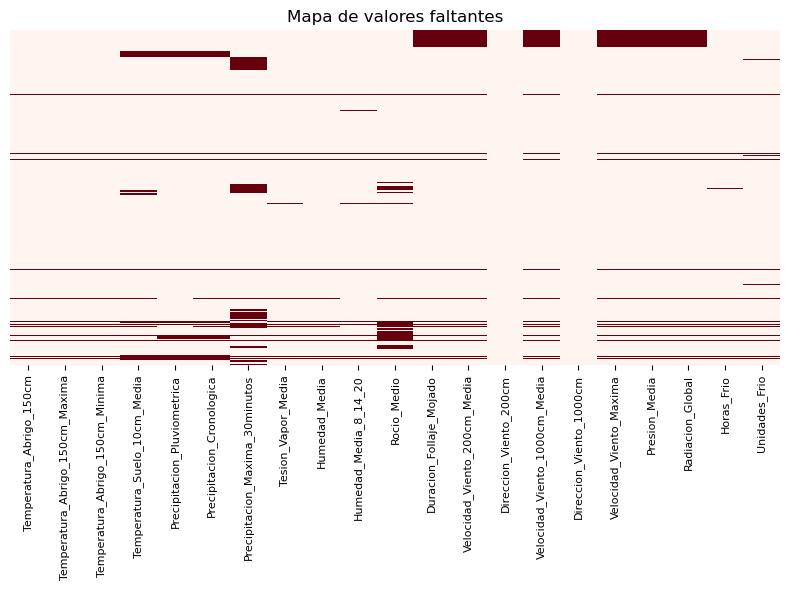

In [13]:
# Visualización simple de patrón de faltantes

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    df.drop(columns = ['Fecha', 'Latitud', 'Longitud', 'Localidad']).isnull(), 
            cbar = False, 
            cmap = 'Reds')
plt.title('Mapa de valores faltantes')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize = 8)
plt.tight_layout()
plt.show()


# Hay muchas filas en las que se encuentran faltantes en todas las columnas menos la Dirección del viento.
# Encontrar la forma de descartarlas

In [14]:
print("Filas duplicadas:")
print(df.duplicated().sum())

Filas duplicadas:
0


A su vez, resulta interesante notar que los valores de la categoría referida a la dirección del viento a 1000 cm son nulos o una 'C'. Ésto es diferente a lo que ocurre en el caso de esta misma medición a 200 cm, que correctamente integra los distintos puntos cardinales. Más allá de suponer que la 'C' significa viento 'calmo' y, considerando que el 97% de los valores de esa categoría toman el mismo valor, procederemos a dejarla de lado.

In [15]:
# Inconsistencias

print(df['Direccion_Viento_200cm'].unique())
print(df['Direccion_Viento_1000cm'].unique())

df = df.drop(columns=['Direccion_Viento_1000cm'])

['  ' 'C ' 'S ' 'W ' 'E ' 'SE' 'NE' 'N ' 'NW']
['  ' 'C ']


#### Valores atípicos

Vamos a utilizar dos métodos gráficos para la detección de outliers:
- Diagramas de cajas y bigotes
- Diagramas de dispersión

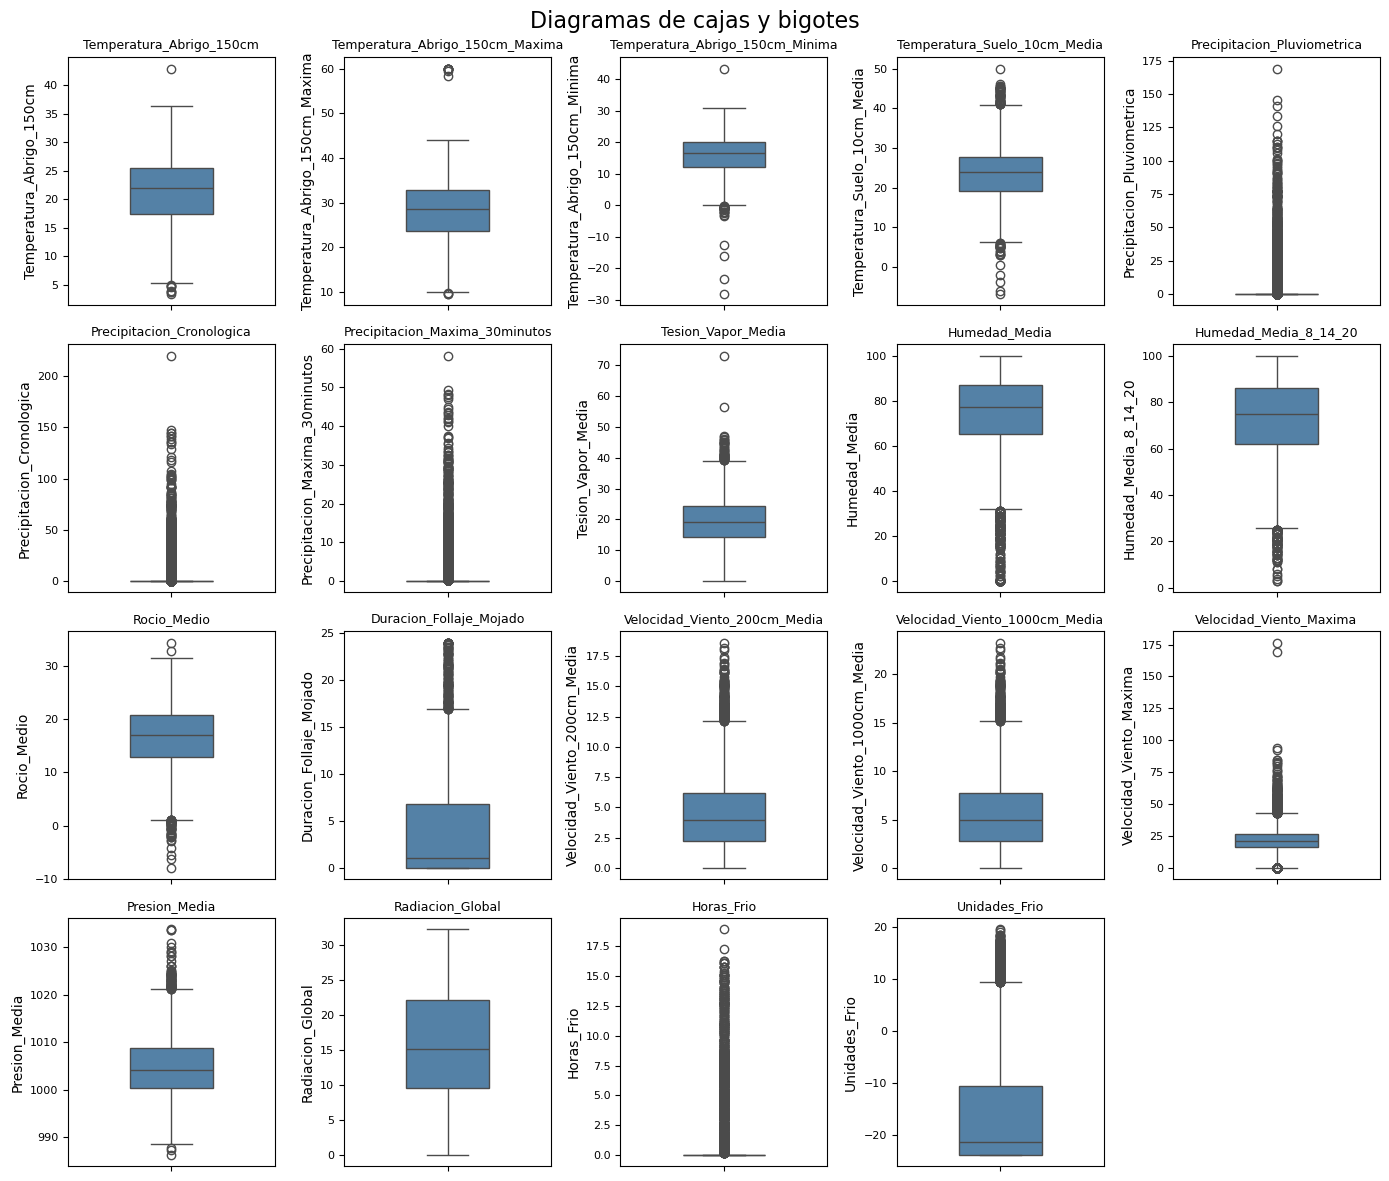

In [16]:
variables = df.drop(columns = ['Fecha', 'Latitud', 'Longitud', 'Localidad', 'Direccion_Viento_200cm']).columns

n_cols = 5
n_rows = 4

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 12),
    sharey = False)

fig.suptitle('Diagramas de cajas y bigotes', fontsize = 16)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(
        y = df[var],
        ax = axes[i],
        color = 'steelblue',
        width = 0.4
    )
    axes[i].set_title(var, fontsize = 9)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'y', labelsize = 8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

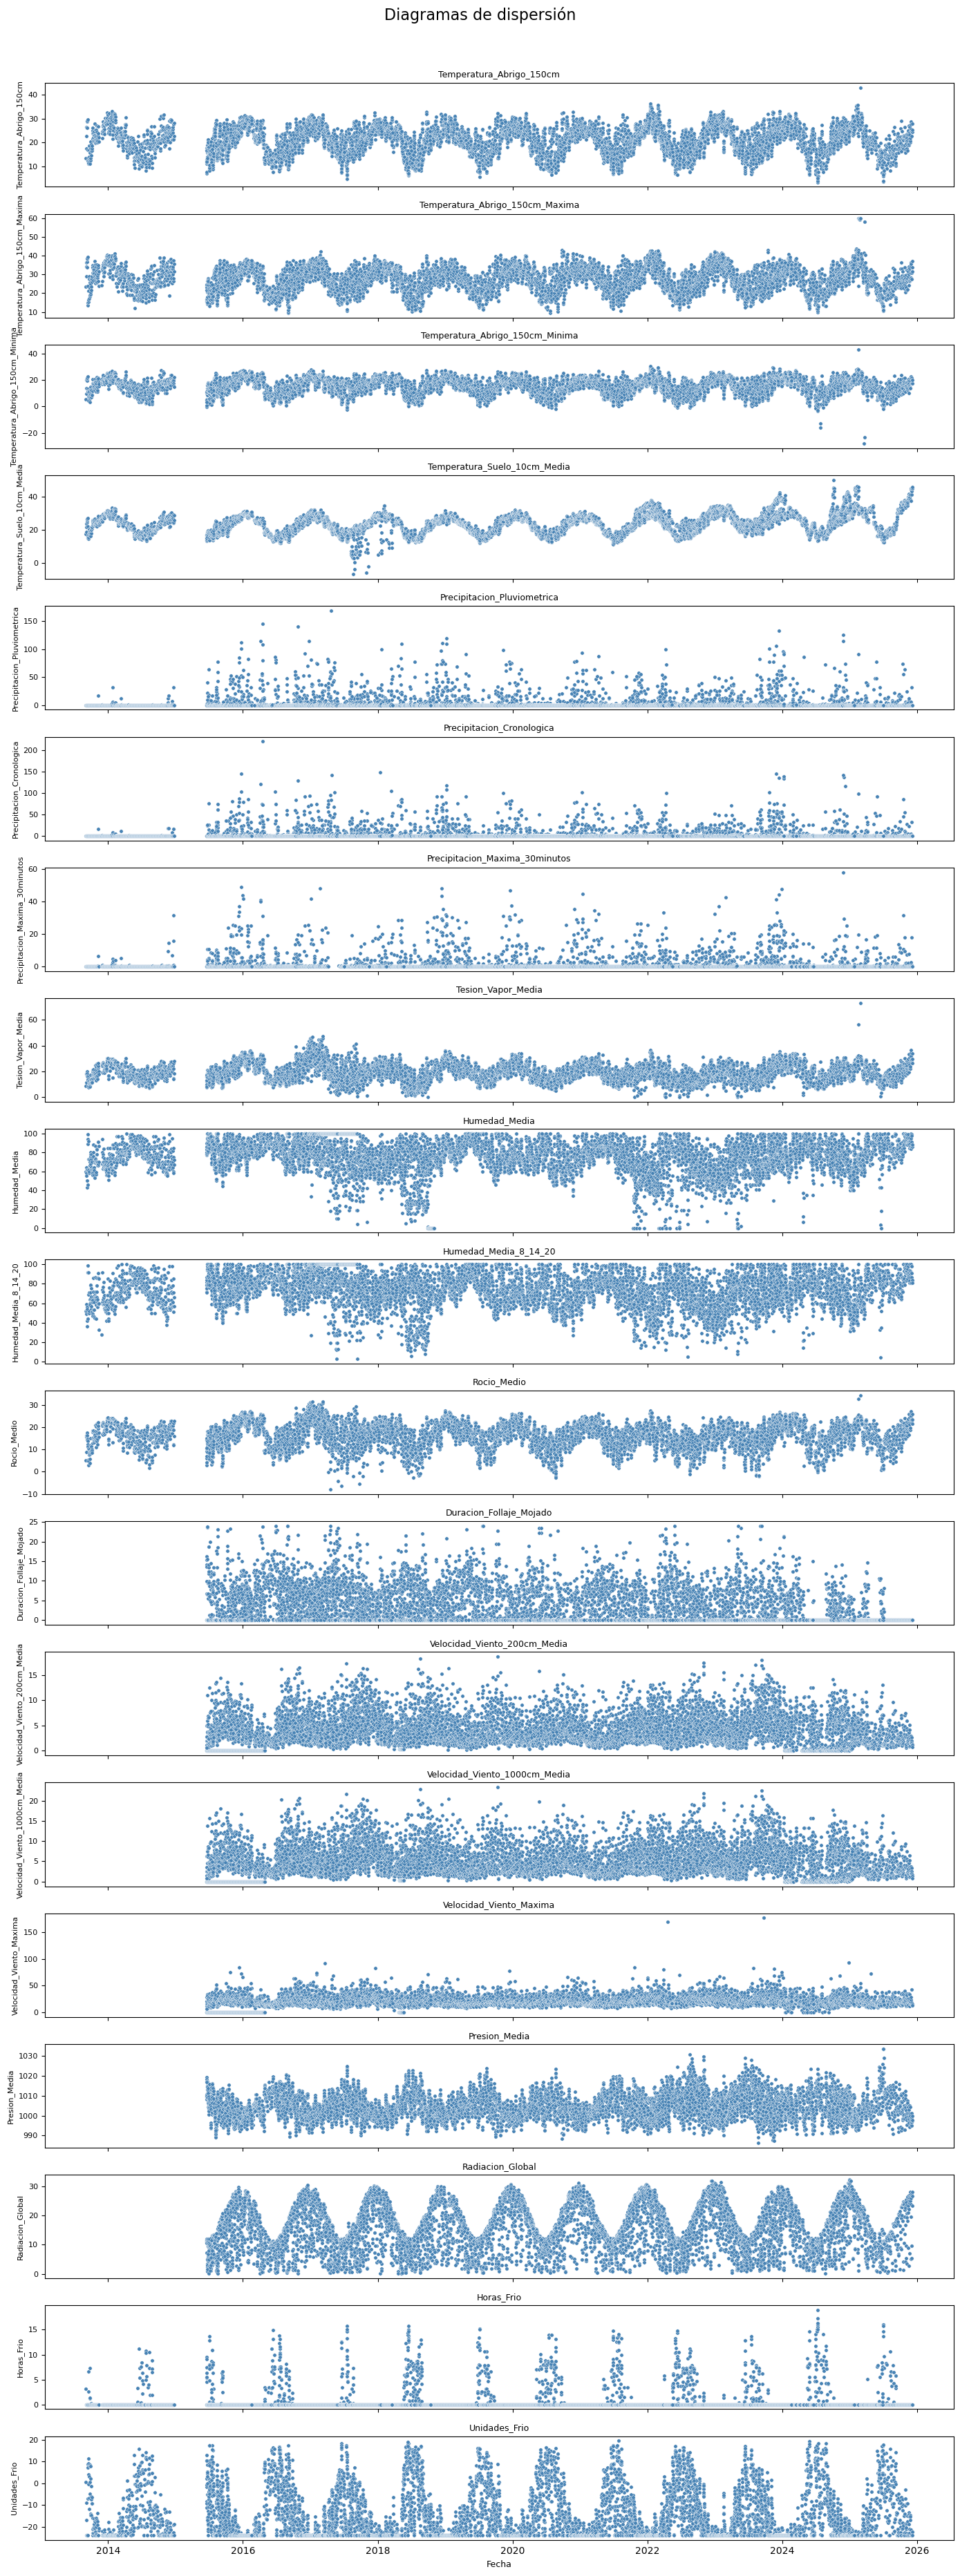

In [17]:
variables = df.drop(columns = ['Fecha', 'Latitud', 'Longitud', 'Localidad', 'Direccion_Viento_200cm']).columns

n_cols = 1
n_rows = 19

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 38),
    sharex = True)

fig.suptitle('Diagramas de dispersión', fontsize = 16)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(
        x = df['Fecha'],
        y = df[var],
        ax = axes[i],
        s = 15,
        #alpha = 0.4,
        color = 'steelblue',
    )
    axes[i].set_title(var, fontsize = 9)
    axes[i].set_ylabel(var, fontsize=8)
    axes[i].tick_params(axis = 'y', labelsize = 8)

axes[-1].set_xlabel('Fecha', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Resumen estadístico

In [18]:
# Obtener las principales medidas de posición y de dispersión de cada variable.

# Estaría bueno hacer un cuadro con las principales medidas estadísticas de cada variable, sumando IQR y Moda.

display(df.drop(columns=['Fecha', 'Latitud', 'Longitud']).describe().round(2))

Temperatura_Abrigo_150cm  Temperatura_Abrigo_150cm_Maxima  \
count                   9508.00                          9493.00   
mean                      21.29                            27.99   
std                        5.62                             6.38   
min                        3.41                             9.50   
25%                       17.36                            23.60   
50%                       21.94                            28.50   
75%                       25.55                            32.70   
max                       42.96                            60.00   

       Temperatura_Abrigo_150cm_Minima  Temperatura_Suelo_10cm_Media  \
count                          9487.00                       9116.00   
mean                             15.90                         23.69   
std                               5.75                          5.83   
min                             -28.10                         -6.80   
25%                              12.10                         19.16   
50%                              16.70                         23.94   
75%                              20.20                         27.85   
max                              43.30                         50.00   

       Precipitacion_Pluviometrica  Precipitacion_Cronologica  \
count                      9149.00                    9129.00   
mean                          3.01                       3.02   
std                          11.22                      11.65   
min                           0.00                       0.00   
25%                           0.00                       0.00   
50%                           0.00                       0.00   
75%                           0.00                       0.00   
max                         169.00                     220.00   

       Precipitacion_Maxima_30minutos  Tesion_Vapor_Media  Humedad_Media  \
count                         8324.00             9437.00        9502.00   
mean                             1.19               19.44          74.71   
std                              4.36                6.84          17.39   
min                              0.00                0.01           0.00   
25%                              0.00               14.45          65.00   
50%                              0.00               19.22          77.00   
75%                              0.00               24.23          87.00   
max                             58.20               73.20         100.00   

       Humedad_Media_8_14_20  Rocio_Medio  Duracion_Follaje_Mojado  \
count                9475.00      8754.00                  9041.00   
mean                   73.17        16.48                     3.57   
std                    17.09         5.58                     4.58   
min                     3.00        -7.96                     0.00   
25%                    62.00        12.85                     0.00   
50%                    75.00        17.07                     1.08   
75%                    86.00        20.69                     6.77   
max                   100.00        34.39                    24.00   

       Velocidad_Viento_200cm_Media  Velocidad_Viento_1000cm_Media  \
count                       8998.00                        8998.00   
mean                           4.48                           5.60   
std                            3.04                           3.80   
min                            0.00                           0.00   
25%                            2.22                           2.78   
50%                            3.95                           4.94   
75%                            6.19                           7.74   
max                           18.63                          23.29   

       Velocidad_Viento_Maxima  Presion_Media  Radiacion_Global  Horas_Frio  \
count                  9049.00        9041.00           9041.00     9426.00   
mean                     22.07        1004.73         

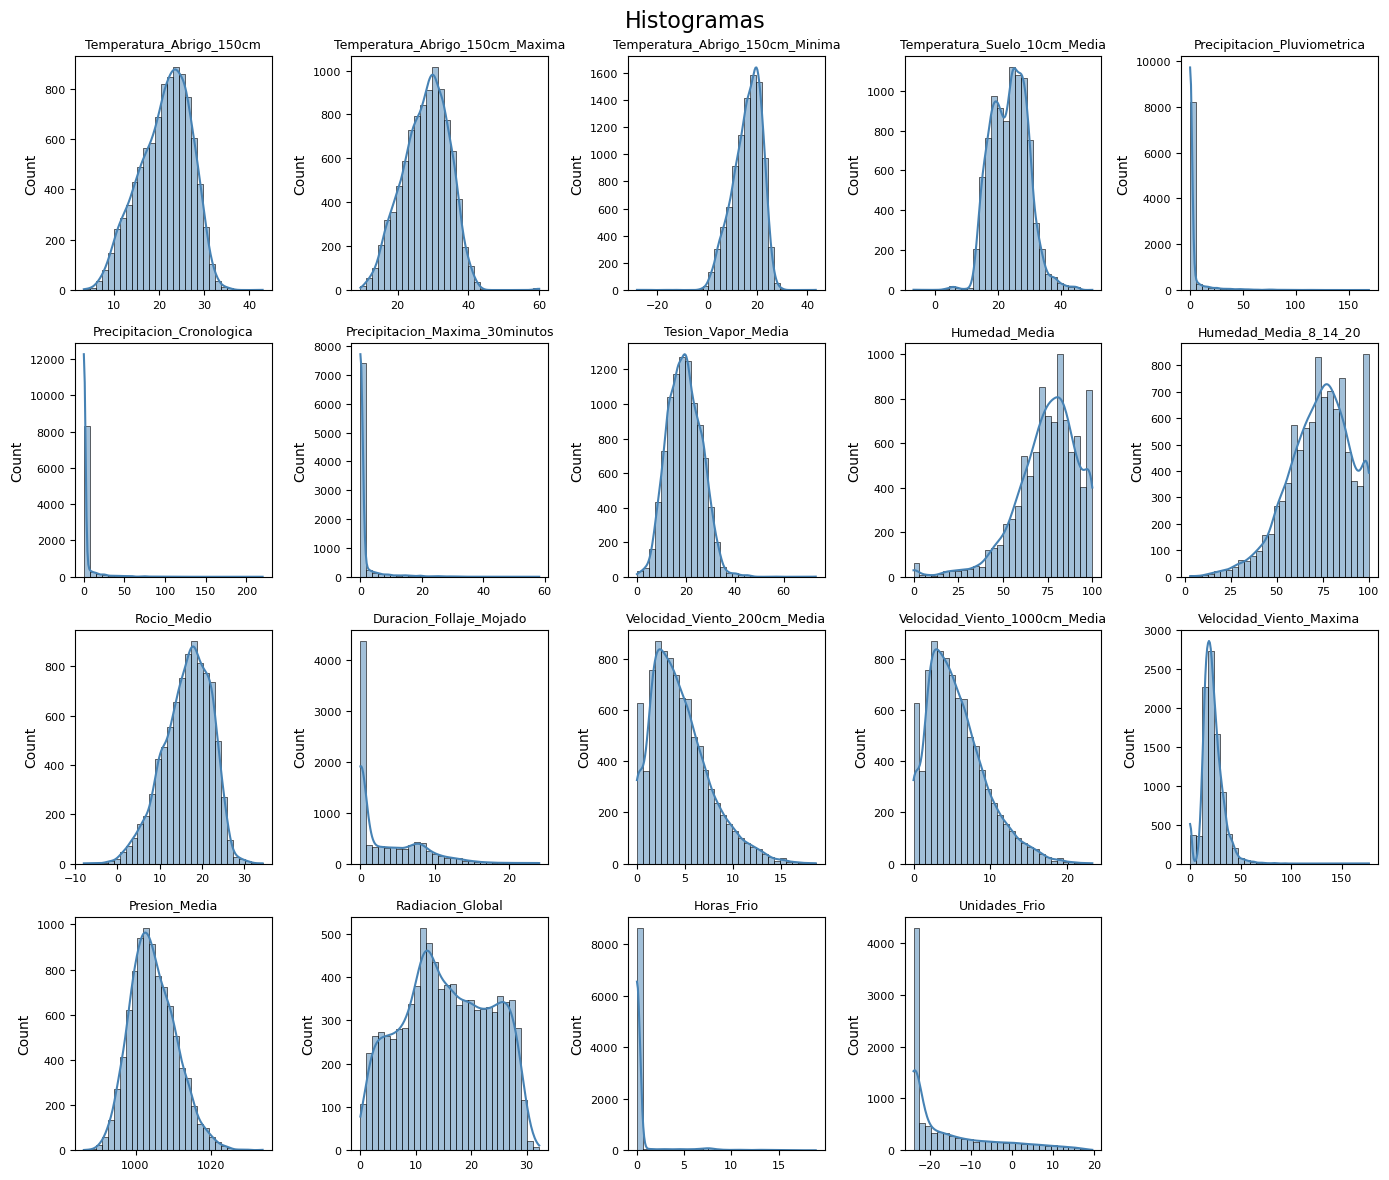

In [19]:
# Histogramas

variables = df.drop(
    columns=['Fecha', 'Latitud', 'Longitud', 'Localidad', 'Direccion_Viento_200cm']
).columns

n_cols = 5
n_rows = 4

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 12),
    sharey = False
)

fig.suptitle('Histogramas', fontsize = 16)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(
        df[var],
        ax = axes[i],
        bins = 30,
        color = 'steelblue',
        kde = True
    )
    axes[i].set_title(var, fontsize = 9)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'both', labelsize = 8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Visualizaciones: análisis bivariado y multivariado

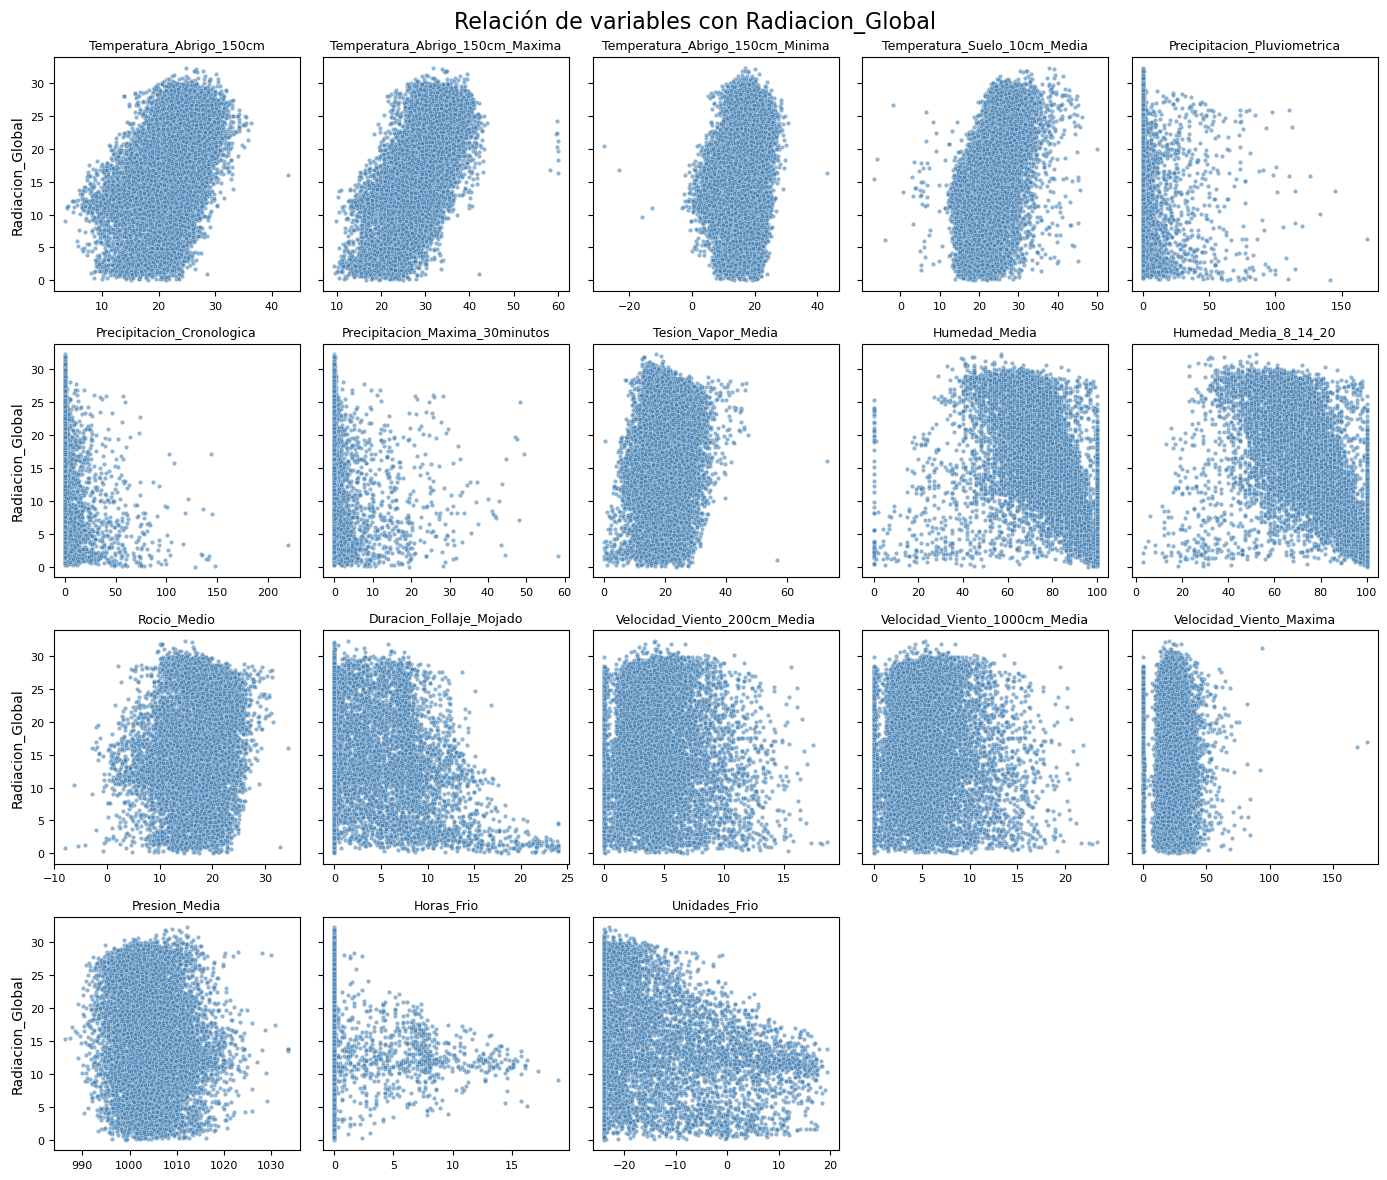

In [33]:
variables = df.drop(
    columns=['Fecha', 'Latitud', 'Longitud', 'Localidad',
             'Direccion_Viento_200cm', 'Radiacion_Global']
).columns

n_cols = 5
n_rows = 4

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 12),
    sharey = True
)

fig.suptitle(
    'Relación de variables con Radiacion_Global',
    fontsize = 16
)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(
        x = df[var],
        y = df['Radiacion_Global'],
        ax = axes[i],
        color = 'steelblue',
        s = 10,
        alpha = 0.6
    )

    axes[i].set_title(var, fontsize = 9)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'both', labelsize = 8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:
# Tal vez estaría bueno hacer el pairplot multivariado con una selección de variables.

# Ver cómo hacer el Análisis de componentes principales (PCA) o Clustering. 

### Preprocesamiento y limpieza avanzada de datos.

In [ ]:
# Comparación de estrategias para el tratamiento de valores faltantes: Medias, KNN o Iterative Imputer
# Podría ser KNN por tratarse de datos con correlaciones locales fuertes.

# Ver formas de quitar los outliers sin que sea de forma manual. Tal vez Z-score para las que se distribuyan normalmente.
# Valores con |zi|>3 suelen considerarse outliers (más de 3 desviaciones estándar de la media).
# Pág 22 limpieza avanzada.
# Si lo hicieramos con IQR creo que dejariamos afuera mucha data.
# Analizar estrategia: eliminar, recortar, transformar o modelar aparte

# Ver si hay que codificar variables categóricas (Localidad, Dirección del viento)

# Deberíamos escalar las variables para que sean comparables? Normalización y Estandarización.



### Conclusiones parciales

In [ ]:
# Elaborar conclusiones parciales que sinteticen los principales hallazgos del análisis
# exploratorio y las decisiones de preprocesamiento adoptadas.

## Modelado, Evaluación e Interpretabilidad

### Selección de modelos

Seleccionar al menos dos algoritmos de machine learning adecuados para el problema
planteado y justificar su elección.

### Entrenamiento, validación y optimización de modelos

Realizar el entrenamiento de los modelos seleccionados, incorporando técnicas de
validación cruzada (cross-validation) y la optimización de hiperparámetros mediante algún
método de búsqueda (por ejemplo, Grid Search, Random Search u otros).

Describir el esquema de validación utilizado y los principales hiperparámetros optimizados.

### Evaluación y análisis de resultados

Evaluar y comparar el desempeño de los modelos utilizando métricas adecuadas para el
problema.

Visualizar y analizar el output de los modelos, incluyendo comparaciones entre valores
reales y predichos sobre el conjunto de test.

Detallar y representar gráficamente la “confianza” o incertidumbre asociada a las
predicciones, cuando corresponda.

### Interpretabilidad de los modelos

Realizar un análisis de interpretabilidad de los modelos entrenados, identificando las variables
más relevantes y discutiendo su impacto en las predicciones.

### Conclusiones

Elaborar conclusiones integradoras a partir de los resultados obtenidos, destacando
fortalezas, limitaciones y posibles mejoras
